<center><img src="https://pbs.twimg.com/media/FommiJ9WIAEBPI0.jpg" width="500" /></center>
    
 <center> 

# Fase Nacional
## Prediccion - Equipo **Malbecs**

</center>

**Integrantes**

- Denis Trosman
- Vito Stamatti
- Sumit Kumar Jethani Jethani

# Contenido

El presente notebook se estructura de la siguiente manera

1. Preproceso UH_2023_TRAIN.txt 
2. Ingenieria de Variables de UH_2023_TRAIN.txt
3. Preproceso DATOS_ETO.txt
4. Ingenieria de Variablesde DATOS_ETO.txt
5. Ingenieria de Variables de DATOS_METEO.txt
6. Entrenamiento y Validacion
7. Prediccion Final

## Transparencia

Memoria del modelo

- Instrucciones de uso 
- Tratamientos sobre los datasets de datos 
- Elección de la muestra de entrenamiento y validación 
- Argumento de la tipología del modelo a desarrollar 
- Criterios aplicados para la selección del ganador 
- Visualización y explicación de los resultados


Consideramos que todos estos puntos fueron tratados correctamente en el script de Predicción. En este, comentamos claramente los pasos seguidos y motivos por los cuales fuimos generando determinadas funciones o dejando de lado variables.

A la hora de seleccionar el modelo ganador, no solo hemos evaluado el puntaje para nuestro set de evaluación, sino tambien que tan bien le fue a este en los años pasados. Tambien tuvimos en cuenta la interpretación del modelo y los tiempos de ejecución de estos, logrando un alto nivel de transparencia.

Esto se plasmó luego en la memoria adjuntada en la entrega final, donde se explica el funcionamiento del modelo y se favorece así el entendimiento por parte del usuario final.

# MENCIONAR SI HACEMOS UN DASHBOARD ACA

# 1. Preproceso UH_2023_TRAIN.txt

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
import seaborn as sns


from malbecs.preprocess import wine as wine_pr
from malbecs.feateng import wine as wine_fe

seed = 42
raw_wine_path = "../data/raw/UH_2023_TRAIN.txt"
pro_wine_path = "../data/processed/wine_pro.csv" 
final_wine_path = "../data/final/wine_final.csv" 

Carga de datos

In [2]:
wine_data = wine_pr.load_wine_dataset(raw_wine_path)
wine_data.sample(5, random_state=seed)

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
1318,15,68089,506,16,600-620,26,2,0,1,0.00,5799.42
9504,22,91845,47,19,520-540,38,2,0,0,0.69,NaN
7222,20,95959,299,12,440-450,17,1,0,1,0.55,1040.00
5391,18,53298,473,10,450-480,9,1,0,0,0.00,740.00
9166,22,2913,449,3,550-700,52,2,0,1,1.33,NaN


Conversion de altitud en formato texto a formato numerico. Se utiliza el promedio de altitudes en el caso de haber 2 valores presentes

Reemplazamos valores en 0 por nulos para ser imputados posteriormente

Imputacion de altitud promedio por estacion

Imputacion jerarquica de superficie por agrupada por diferentes niveles de agregacion.

In [3]:
wine_data = wine_pr.preproces_wine_data(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,std_superficie,std_superficie_null,sup_is_nan
1318,15,68089,506,16,610.00,26,2,0,1,2.40,5799.42,0.00,True,1.00
9504,22,91845,47,19,530.00,38,2,0,0,0.69,NaN,0.00,True,0.00
7222,20,95959,299,12,445.00,17,1,0,1,0.55,1040.00,0.00,True,0.00
5391,18,53298,473,10,465.00,9,1,0,0,0.70,740.00,NaN,False,1.00
9166,22,2913,449,3,625.00,52,2,0,1,1.33,NaN,0.45,False,0.00


### Diccionario de Variables

- std_superficie_null: si el desvio estandard de la superficie para la finca-variedad-modo es nulo
- std_superficie: el desvio estandar de la superficie para esta finca-variedad-modo
- sup_is_nan: si la superficie era nula y por lo tanto fue imputada
- sup_tot_camp_finca: la superficie total de esta finca para la campaña
- superficie_total: la superficie total media de la finca.
- n_var_camp_finca: cantidad de variedades diferences cultivadas en una finca
- prod_shift1: produccion de la finca en la campaña anterior
- prod_shift2: produccion de la finca dos campañas anteriores
- sup_shift1: superficie de la finca en la campaña anterior
- sup_shift2: superficie de la finca dos campañas anteriores
- prod_shift1_gt_shift2: si la produccion de la campaña anterior fue mayor a la de dos anteriores
- prod_shift_max: la maxima producion entre la campaña anterior y dos anteriores.
- prod_shift_change: cambio entre la produccion de la campaña anterior y las dos anteriores.
- prod_shift_avg: promedio de la produccion de la campaña anterior y dos anteriores.
- prod_est_mean_change: cambio en la produccion media de la estacion para la campaña anterior y dos anteriores.
- prod_he_shift1: produccion por hectarea de la campaña anterior
- prod_he_shift2: produccion por hectarea de dos campañas anteriores.
- prod_he_shift_change: cambio de produccion por hectarea entre la campaña anterior y dos anteriores.
- prod_he_shift_avg: produccion por hectarea promedio entre la campaña anterior y dos anteriores.
- prod_he_var_zone_mean_hist: promedio historico de produccion por hectarea para la variedad-modo-zona.
- prod_he_var_zone_std_hist: desvio estandard historico de produccion por hectarea para la variedad-modo-zona.
- prod_he_var_mean_hist: promedio historico de produccion por hectarea para la variedad.
- prod_he_var_std_hist: desvio estandard historico de produccion por hectarea para la variedad.
- prod_var_shift_1: produccion por hectarea de la campaña anterior.
- prod_var_shift_2: produccion por hectarea de dos campañas anteriores.
- prod_he_var_modo_zona_mean_shift1: produccion por hectarea promedio para la variedad-modo-zona.
- prod_he_var_modo_zona_std_shift1: desvio estandard de la produccion por hectarea para la variedad-modo-zona.
- prod_he_var_modo_zona_change: cambio en la produccion por hectarea de la campaña anterior y dos anteriores.
- prod_he_var_modo_mean_shift1: produccion por hectarea promedio para cada variedad y modo
- prod_he_var_modo_std_shift1: desvio estandard de la produccion por hectarea para cada variedad y modo
- prod_he_var_modo_change: 
- prod_he_var_mean_shift1: 
- prod_he_var_std_shift1: 
- prod_he_var_change: 
- prod_he_zona_mean_shift1: 
- prod_he_zona_std_shift1: 
- prod_he_zona_change: 
- prod_finca_shift_1: 
- prod_finca_shift_1: 
- prod_he_shift1_total: 
- prod_he_shift2_total: 
- prod_he_shift_change_total: 
- prod_he_shift_avg_total: 
- prod_he_var_zone_mean_hist_total: 
- prod_he_var_zone_std_hist_total: 
- prod_he_var_mean_hist_total: 
- prod_he_var_std_hist_total: 
- prod_he_var_modo_zona_mean_shift1_total: 
- prod_he_var_modo_zona_std_shift1_total: 
- prod_he_var_modo_zona_change_total: 
- prod_he_var_modo_mean_shift1_total: 
- prod_he_var_modo_std_shift1_total: 
- prod_he_var_modo_change_total: 
- prod_he_var_mean_shift1_total: 
- prod_he_var_std_shift1_total: 
- prod_he_var_change_total: 
- prod_he_zona_mean_shift1_total: 
- prod_he_zona_std_shift1_total: 
- prod_he_zona_change_tota: 

In [4]:
wine_data = wine_fe.feateng_wine_data(wine_data)
wine_data.sample(5, random_state=seed)

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,produccion,std_superficie,std_superficie_null,sup_is_nan,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_var_modo_zona_mean_shift1,prod_he_var_modo_zona_std_shift1,prod_he_var_modo_zona_change,prod_he_var_modo_mean_shift1,prod_he_var_modo_std_shift1,prod_he_var_modo_change,prod_he_var_mean_shift1,prod_he_var_std_shift1,prod_he_var_change,prod_he_zona_mean_shift1,prod_he_zona_std_shift1,prod_he_zona_change,prod_finca_shift_1,prod_finca_shift_1,prod_he_shift1_total,prod_he_shift2_total,prod_he_shift_change_total,prod_he_shift_avg_total,prod_he_var_zone_mean_hist_total,prod_he_var_zone_std_hist_total,prod_he_var_mean_hist_total,prod_he_var_std_hist_total,prod_he_var_modo_zona_mean_shift1_total,prod_he_var_modo_zona_std_shift1_total,prod_he_var_modo_zona_change_total,prod_he_var_modo_mean_shift1_total,prod_he_var_modo_std_shift1_total,prod_he_var_modo_change_total,prod_he_var_mean_shift1_total,prod_he_var_std_shift1_total,prod_he_var_change_total,prod_he_zona_mean_shift1_total,prod_he_zona_std_shift1_total,prod_he_zona_change_total
1318,15,87873,272,16,635.00,59,1,0,1,5.96,15377.76,0.00,True,1.00,13.29,13.29,2,8456.80,-1.00,5.96,-1.00,1,8456.80,8457.80,8456.80,0.89,1419.81,-1.00,1420.81,1419.81,817.45,1572.02,1977.78,3850.73,16394.40,-1.00,1752.81,1935.50,1753.81,4087.89,4695.14,4025.84,4200.38,4652.38,4161.02,2314.70,2448.98,2315.70,22080.00,22080.00,8456.80,-5.96,8462.76,8456.80,4868.95,9363.45,11780.24,22936.11,10440.28,11528.42,10446.23,24348.70,27965.66,23979.10,25018.75,27710.96,24784.27,13787.04,14586.87,13792.99
9504,22,57052,233,9,440.00,17,1,0,1,1.83,-1.00,0.00,True,0.00,10.82,10.82,3,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.68,-1.00,-1.00,0.00,-1.00,-1.00,-1.00,3076.62,3996.87,-1.00,-1.00,-1.00,-1.00,0.00,3177.84,2257.29,-23.73,3430.25,2322.29,-351.39,-1.00,0.00,0.00,-1.00,-1.00,-1.83,-1.83,0.00,-1.83,-1.83,-1.83,5630.22,7314.28,-1.83,-1.83,0.00,5815.45,4130.83,-43.42,6277.35,4249.79,-643.04,-1.83,0.00,0.00
7222,20,38443,939,16,610.00,17,1,0,1,1.11,4368.00,0.00,True,0.00,1.11,1.11,1,3822.00,5526.61,1.11,1.11,0,5526.61,-1704.61,4674.31,0.54,3445.42,4982.07,-1536.65,4213.74,4774.35,3035.77,3058.48,4201.26,3822.00,5526.61,5463.60,1892.98,594.65,3313.54,2041.14,-396.48,3992.98,2414.55,-268.13,4713.40,2442.53,-11.15,3822.00,3822.00,3822.00,5526.61,-1704.61,4674.30,5296.19,3367.58,3392.78,4660.45,6060.78,2099.88,659.65,3675.71,2264.24,-439.81,4429.42,2678.47,-297.44,5228.57,2709.50,-12.36
5391,18,94589,401,10,525.00,59,2,0,1,0.21,1066.82,0.00,True,1.00,0.21,0.61,1,-1.00,-1.00,-1.00,-1.00,0,-1.00,0.00,-1.00,0.42,-1.00,-1.00,0.00,-1.00,-1.00,0.00,4203.25,4025.39,-1.00,-1.00,-1.00,0.00,0.00,3948.82,2709.28,-1316.82,3033.67,2268.50,-1526.90,-1.00,0.00,0.00,-1.00,-1.00,-0.21,-0.21,0.00,-0.21,-0.21,0.00,896.55,858.61,-0.21,0.00,0.00,842.28,577.89,-280.88,647.08,483.87,-325.69,-0.21,0.00,0.00
9166,22,84380,441,12,462.50,17,1,0,1,0.12,-1.00,0.00,True,0.00,0.12,0.12,1,285.58,293.44,0.12,0.12,0,293.44,-7.86,289.51,0.41,2414.03,2480.47,-66.44,2447.25,2472.05,2780.54,3076.62,3996.87,285.58,293.44,2460.95,1880.17,-1415.93,3177.84,2257.29,-23.73,3430.25,2322.29,-351.39,3981.74,2636.92,-1909.53,285.58,285.58,285.58,293.44,-7.86,289.51,292.44,328.94,363.96,472.83,291.13,222.42,-167.50,375.94,267.04,-2.81,405.80,274.73,-41.57,471.04,311.95,-225.90


# 2. Preproceso DATOS_ETO.txt

In [5]:
from malbecs.preprocess import eto as eto_pr
from malbecs.feateng import eto as eto_fe

raw_eto_path = '../data/raw/DATOS_ETO.TXT'

In [6]:
eto_data = eto_pr.load_eto_dataset(raw_eto_path)

In [7]:
eto_data = eto_pr.preprocess_eto_dataset(
    eto_data,
    cols_mean=eto_pr.cols_mean,
    cols_sum=eto_pr.cols_sum
)
eto_data.head()

,year,ID_ESTACION,MeanDewpointLocalDayAvgMonth1,MeanDewpointLocalDayAvgMonth2,MeanDewpointLocalDayAvgMonth3,MeanDewpointLocalDayAvgMonth4,MeanDewpointLocalDayAvgMonth5,MeanDewpointLocalDayAvgMonth6,MeanEvapotranspirationLocalDayAvgMonth1,MeanEvapotranspirationLocalDayAvgMonth2,MeanEvapotranspirationLocalDayAvgMonth3,MeanEvapotranspirationLocalDayAvgMonth4,MeanEvapotranspirationLocalDayAvgMonth5,MeanEvapotranspirationLocalDayAvgMonth6,MeanFeelsLikeLocalDayAvgMonth1,MeanFeelsLikeLocalDayAvgMonth2,MeanFeelsLikeLocalDayAvgMonth3,MeanFeelsLikeLocalDayAvgMonth4,MeanFeelsLikeLocalDayAvgMonth5,MeanFeelsLikeLocalDayAvgMonth6,MeanGlobalHorizontalIrradianceLocalDayAvgMonth1,MeanGlobalHorizontalIrradianceLocalDayAvgMonth2,MeanGlobalHorizontalIrradianceLocalDayAvgMonth3,MeanGlobalHorizontalIrradianceLocalDayAvgMonth4,MeanGlobalHorizontalIrradianceLocalDayAvgMonth5,MeanGlobalHorizontalIrradianceLocalDayAvgMonth6,MeanGustLocalDayAvgMonth1,MeanGustLocalDayAvgMonth2,MeanGustLocalDayAvgMonth3,MeanGustLocalDayAvgMonth4,MeanGustLocalDayAvgMonth5,MeanGustLocalDayAvgMonth6,MeanMSLPLocalDayAvgMonth1,MeanMSLPLocalDayAvgMonth2,MeanMSLPLocalDayAvgMonth3,MeanMSLPLocalDayAvgMonth4,MeanMSLPLocalDayAvgMonth5,MeanMSLPLocalDayAvgMonth6,MeanPrecipAmountLocalDayAvgMonth1,MeanPrecipAmountLocalDayAvgMonth2,MeanPrecipAmountLocalDayAvgMonth3,MeanPrecipAmountLocalDayAvgMonth4,MeanPrecipAmountLocalDayAvgMonth5,MeanPrecipAmountLocalDayAvgMonth6,MeanRelativeHumidityLocalDayAvgMonth1,MeanRelativeHumidityLocalDayAvgMonth2,MeanRelativeHumidityLocalDayAvgMonth3,MeanRelativeHumidityLocalDayAvgMonth4,MeanRelativeHumidityLocalDayAvgMonth5,MeanRelativeHumidityLocalDayAvgMonth6,MeanSnowAmountLocalDayAvgMonth1,MeanSnowAmountLocalDayAvgMonth2,MeanSnowAmountLocalDayAvgMonth3,MeanSnowAmountLocalDayAvgMonth4,MeanSnowAmountLocalDayAvgMonth5,MeanSnowAmountLocalDayAvgMonth6,MeanTemperatureLocalDayAvgMonth1,MeanTemperatureLocalDayAvgMonth2,MeanTemperatureLocalDayAvgMonth3,MeanTemperatureLocalDayAvgMonth4,MeanTemperatureLocalDayAvgMonth5,MeanTemperatureLocalDayAvgMonth6,MeanUVIndexLocalDayAvgMonth1,MeanUVIndexLocalDayAvgMonth2,MeanUVIndexLocalDayAvgMonth3,MeanUVIndexLocalDayAvgMonth4,MeanUVIndexLocalDayAvgMonth5,MeanUVIndexLocalDayAvgMonth6,MeanVisibilityLocalDayAvgMonth1,MeanVisibilityLocalDayAvgMonth2,MeanVisibilityLocalDayAvgMonth3,MeanVisibilityLocalDayAvgMonth4,MeanVisibilityLocalDayAvgMonth5,MeanVisibilityLocalDayAvgMonth6,MeanWindSpeedLocalDayAvgMonth1,MeanWindSpeedLocalDayAvgMonth2,MeanWindSpeedLocalDayAvgMonth3,MeanWindSpeedLocalDayAvgMonth4,MeanWindSpeedLocalDayAvgMonth5,MeanWindSpeedLocalDayAvgMonth6,MeanDewpointLocalDayMaxMonth1,MeanDewpointLocalDayMaxMonth2,MeanDewpointLocalDayMaxMonth3,MeanDewpointLocalDayMaxMonth4,MeanDewpointLocalDayMaxMonth5,MeanDewpointLocalDayMaxMonth6,MeanEvapotranspirationLocalDayMaxMonth1,MeanEvapotranspirationLocalDayMaxMonth2,MeanEvapotranspirationLocalDayMaxMonth3,MeanEvapotranspirationLocalDayMaxMonth4,MeanEvapotranspirationLocalDayMaxMonth5,MeanEvapotranspirationLocalDayMaxMonth6,MeanFeelsLikeLocalDayMaxMonth1,MeanFeelsLikeLocalDayMaxMonth2,MeanFeelsLikeLocalDayMaxMonth3,MeanFeelsLikeLocalDayMaxMonth4,MeanFeelsLikeLocalDayMaxMonth5,MeanFeelsLikeLocalDayMaxMonth6,MeanGlobalHorizontalIrradianceLocalDayMaxMonth1,MeanGlobalHorizontalIrradianceLocalDayMaxMonth2,MeanGlobalHorizontalIrradianceLocalDayMaxMonth3,MeanGlobalHorizontalIrradianceLocalDayMaxMonth4,MeanGlobalHorizontalIrradianceLocalDayMaxMonth5,MeanGlobalHorizontalIrradianceLocalDayMaxMonth6,MeanGustLocalDayMaxMonth1,MeanGustLocalDayMaxMonth2,MeanGustLocalDayMaxMonth3,MeanGustLocalDayMaxMonth4,MeanGustLocalDayMaxMonth5,MeanGustLocalDayMaxMonth6,MeanMSLPLocalDayMaxMonth1,MeanMSLPLocalDayMaxMonth2,MeanMSLPLocalDayMaxMonth3,MeanMSLPLocalDayMaxMonth4,MeanMSLPLocalDayMaxMonth5,MeanMSLPLocalDayMaxMonth6,MeanPrecipAmountLocalDayMaxMonth1,MeanPrecipAmountLocalDayMaxMonth2,MeanPrecipAmountLocalDayMaxMonth3,MeanPrecipAmountLocalDayMaxMonth4,MeanPrecipAmountLocalDayMaxMonth5,MeanPrecipAmountLocalDayMa

Seleccionamos las columnas que nos interesa utilizar como potenciales features.

Creamos las columnas de *year* y *month* para pode pivotear el los datos y combinarlos con nuestro dataset de entrenamiento.

Realizamos un pivot sobre los datos

Seleccionamos los meses relevantes para el problema. Dichos meses se corresponden con el periodo de crecimiento de la vid.

Imputamos valores nulos con 0 para variables asociadas a Gust, Snow y Precipitation

Imputamos datos faltantes a partir de promedios mensuales por estacion.

Pivoteamos data para obtener un registro por estacion y mes

Imputamos datos faltantes con promedios por estacion

Generamos nuevas variables acumulando los meses.

In [8]:
eto_data = eto_fe.feateng_eto(eto_data)
eto_data.head()

,year,ID_ESTACION,MeanDewpointLocalDayAvgMonth1,MeanDewpointLocalDayAvgMonth2,MeanDewpointLocalDayAvgMonth3,MeanDewpointLocalDayAvgMonth4,MeanDewpointLocalDayAvgMonth5,MeanDewpointLocalDayAvgMonth6,MeanEvapotranspirationLocalDayAvgMonth1,MeanEvapotranspirationLocalDayAvgMonth2,MeanEvapotranspirationLocalDayAvgMonth3,MeanEvapotranspirationLocalDayAvgMonth4,MeanEvapotranspirationLocalDayAvgMonth5,MeanEvapotranspirationLocalDayAvgMonth6,MeanFeelsLikeLocalDayAvgMonth1,MeanFeelsLikeLocalDayAvgMonth2,MeanFeelsLikeLocalDayAvgMonth3,MeanFeelsLikeLocalDayAvgMonth4,MeanFeelsLikeLocalDayAvgMonth5,MeanFeelsLikeLocalDayAvgMonth6,MeanGlobalHorizontalIrradianceLocalDayAvgMonth1,MeanGlobalHorizontalIrradianceLocalDayAvgMonth2,MeanGlobalHorizontalIrradianceLocalDayAvgMonth3,MeanGlobalHorizontalIrradianceLocalDayAvgMonth4,MeanGlobalHorizontalIrradianceLocalDayAvgMonth5,MeanGlobalHorizontalIrradianceLocalDayAvgMonth6,MeanGustLocalDayAvgMonth1,MeanGustLocalDayAvgMonth2,MeanGustLocalDayAvgMonth3,MeanGustLocalDayAvgMonth4,MeanGustLocalDayAvgMonth5,MeanGustLocalDayAvgMonth6,MeanMSLPLocalDayAvgMonth1,MeanMSLPLocalDayAvgMonth2,MeanMSLPLocalDayAvgMonth3,MeanMSLPLocalDayAvgMonth4,MeanMSLPLocalDayAvgMonth5,MeanMSLPLocalDayAvgMonth6,MeanPrecipAmountLocalDayAvgMonth1,MeanPrecipAmountLocalDayAvgMonth2,MeanPrecipAmountLocalDayAvgMonth3,MeanPrecipAmountLocalDayAvgMonth4,MeanPrecipAmountLocalDayAvgMonth5,MeanPrecipAmountLocalDayAvgMonth6,MeanRelativeHumidityLocalDayAvgMonth1,MeanRelativeHumidityLocalDayAvgMonth2,MeanRelativeHumidityLocalDayAvgMonth3,MeanRelativeHumidityLocalDayAvgMonth4,MeanRelativeHumidityLocalDayAvgMonth5,MeanRelativeHumidityLocalDayAvgMonth6,MeanSnowAmountLocalDayAvgMonth1,MeanSnowAmountLocalDayAvgMonth2,MeanSnowAmountLocalDayAvgMonth3,MeanSnowAmountLocalDayAvgMonth4,MeanSnowAmountLocalDayAvgMonth5,MeanSnowAmountLocalDayAvgMonth6,MeanTemperatureLocalDayAvgMonth1,MeanTemperatureLocalDayAvgMonth2,MeanTemperatureLocalDayAvgMonth3,MeanTemperatureLocalDayAvgMonth4,MeanTemperatureLocalDayAvgMonth5,MeanTemperatureLocalDayAvgMonth6,MeanUVIndexLocalDayAvgMonth1,MeanUVIndexLocalDayAvgMonth2,MeanUVIndexLocalDayAvgMonth3,MeanUVIndexLocalDayAvgMonth4,MeanUVIndexLocalDayAvgMonth5,MeanUVIndexLocalDayAvgMonth6,MeanVisibilityLocalDayAvgMonth1,MeanVisibilityLocalDayAvgMonth2,MeanVisibilityLocalDayAvgMonth3,MeanVisibilityLocalDayAvgMonth4,MeanVisibilityLocalDayAvgMonth5,MeanVisibilityLocalDayAvgMonth6,MeanWindSpeedLocalDayAvgMonth1,MeanWindSpeedLocalDayAvgMonth2,MeanWindSpeedLocalDayAvgMonth3,MeanWindSpeedLocalDayAvgMonth4,MeanWindSpeedLocalDayAvgMonth5,MeanWindSpeedLocalDayAvgMonth6,MeanDewpointLocalDayMaxMonth1,MeanDewpointLocalDayMaxMonth2,MeanDewpointLocalDayMaxMonth3,MeanDewpointLocalDayMaxMonth4,MeanDewpointLocalDayMaxMonth5,MeanDewpointLocalDayMaxMonth6,MeanEvapotranspirationLocalDayMaxMonth1,MeanEvapotranspirationLocalDayMaxMonth2,MeanEvapotranspirationLocalDayMaxMonth3,MeanEvapotranspirationLocalDayMaxMonth4,MeanEvapotranspirationLocalDayMaxMonth5,MeanEvapotranspirationLocalDayMaxMonth6,MeanFeelsLikeLocalDayMaxMonth1,MeanFeelsLikeLocalDayMaxMonth2,MeanFeelsLikeLocalDayMaxMonth3,MeanFeelsLikeLocalDayMaxMonth4,MeanFeelsLikeLocalDayMaxMonth5,MeanFeelsLikeLocalDayMaxMonth6,MeanGlobalHorizontalIrradianceLocalDayMaxMonth1,MeanGlobalHorizontalIrradianceLocalDayMaxMonth2,MeanGlobalHorizontalIrradianceLocalDayMaxMonth3,MeanGlobalHorizontalIrradianceLocalDayMaxMonth4,MeanGlobalHorizontalIrradianceLocalDayMaxMonth5,MeanGlobalHorizontalIrradianceLocalDayMaxMonth6,MeanGustLocalDayMaxMonth1,MeanGustLocalDayMaxMonth2,MeanGustLocalDayMaxMonth3,MeanGustLocalDayMaxMonth4,MeanGustLocalDayMaxMonth5,MeanGustLocalDayMaxMonth6,MeanMSLPLocalDayMaxMonth1,MeanMSLPLocalDayMaxMonth2,MeanMSLPLocalDayMaxMonth3,MeanMSLPLocalDayMaxMonth4,MeanMSLPLocalDayMaxMonth5,MeanMSLPLocalDayMaxMonth6,MeanPrecipAmountLocalDayMaxMonth1,MeanPrecipAmountLocalDayMaxMonth2,MeanPrecipAmountLocalDayMaxMonth3,MeanPrecipAmountLocalDayMaxMonth4,MeanPrecipAmountLocalDayMaxMonth5,MeanPrecipAmountLocalDayMa

# 3. Preproceso de DATOS_METEO.txt


In [9]:
from malbecs.preprocess import meteo as meteo_pr

raw_meteo_path = "../data/raw/DATOS_METEO.TXT"

meteo_data = meteo_pr.load_meteo_data(raw_meteo_path)

In [10]:
meteo_data = meteo_pr.preproces_meteo_data(meteo_data)

Generamos variables de temperatura promedio durante el dia y durante la noche, pero utilizando una franja horaria diferente a la disponible en DATOS_ETO.txt.

A partir del a variable UVIndex podemos extraer las horas de sol presentes en cada dia.

Generamos un dataset final por estacion y año.

# 4. Entrenamiento y Validacion

In [63]:
import matplotlib.pyplot as plt
from malbecs.modeling import train as tr
from malbecs.modeling import models as mm
from sklearn.model_selection import cross_validate
import numpy as np

def show_feat_imps(feat_imp, feat_names):
    pd.DataFrame(
        feat_imp,
        index=feat_names,
        columns=["feat_imp"]
    ).sort_values("feat_imp")[-50:].plot(kind='barh', figsize=(6, 15))
    

In [64]:
data = tr.merge_data(
    wine_data,
    eto_data,
    meteo_data
)

In [65]:
data_train = tr.filter_camp(data.copy(), min_camp=15, max_camp=21)

X, y = tr.xy_split(data_train)

X = tr.convert_cat_features(X)

train_idxs, test_idxs = tr.CampKFold.get_train_test(
    X['campaña'], from_camp=19, to_camp=21
)

cv = tr.CampKFold(train_idxs, test_idxs)

m = mm.get_final_model()
m


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Flag',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['sup_is_nan']),
                                                 ('Zona_encoder',
                                                  TargetEncoder(),
                                                  ['id_zona']),
                                                 ('Zona_encoder_2',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_zona']),
                                                 ('Variedad_encoder',
                                                  OrdinalEncoder(handle_unk...
                                                   'SumTotalPrecipAmountLocalDayMonth4',
                                                   'SumTotalPrecipAmountLocalDayMonth5',
                                                   'SumTotalPrecipAmountLocalDayMonth6']),
                                                 ('Snow', StandardScaler(),
                                                  ['SumTotalSnowAmountLocalDayMonth1',
                                                   'SumTotalSnowAmountLocalDayMonth2'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.2, max_samples=0.8,
                                       min_samples_leaf=4, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

Separamos datos de entrenamiento, test y entrega.

Generamos tambien los periodos para la validacion cruzada.

Definicion y validacion del modelo

In [66]:
from sklearn.model_selection import cross_validate
import numpy as np

res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])
print(f"Train Mean RMSE: {np.mean(res.get('train_score'))}")
print(f"Test Mean RMSE: {np.mean(res.get('test_score'))}")

train:  [-4799.10657187 -4554.70950316 -4573.13390607]
test:  [-4772.69965371 -6693.3883576  -5282.4933207 ]
Train Mean RMSE: -4642.316660367932
Test Mean RMSE: -5582.860444006027


Importancia de variables

- Las variables más importantes para la toma de decisiones del modelo son las producciones pasadas, en promedio y en valores maximos.
    - "prod_shift_avg": promedio de la produccion en los años anteriores para cada combinacion id_finca, variedad, modo, tipo.
    - "prod_shift_max": máximo de la produccion en los años anteriores para cada combinacion id_finca, variedad, modo, tipo.
- Luego le siguen aquellas que generan producciones hipotéticas según las superficies de las fincas y sus variedades, modos y tipos.
    - prod_he_var_zone_mean_hist_total
    - prod_he_var_modo_zona_mean_shift1_total
- La superficie en sí tambien suma importancia
- Luego le siguen aquellas variables climáticas como por ejemplo los PCA para variables de precipitacion, o los días de lluvia por encima de dos desvios estandar.

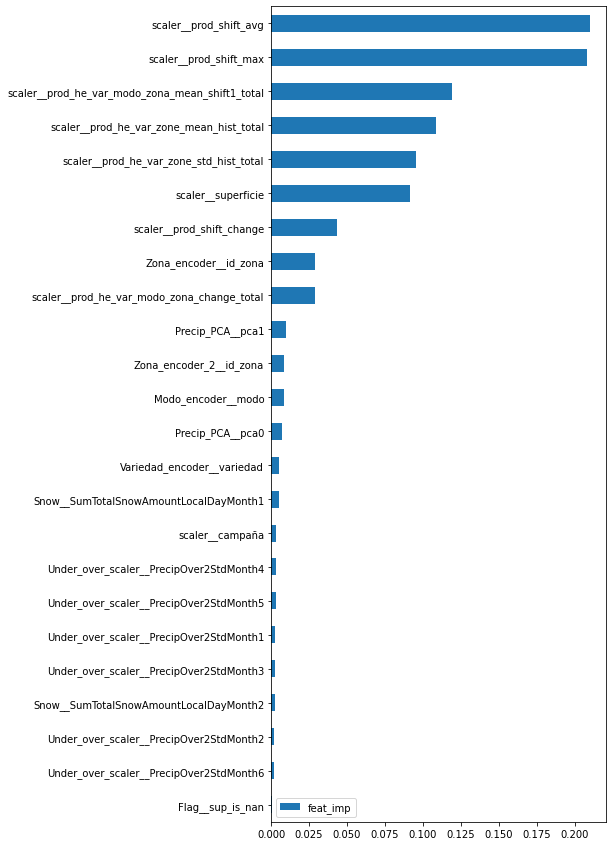

In [67]:
m.fit(X,y)

show_feat_imps(
    m[-1].feature_importances_,
    m[:-1].get_feature_names_out(),
)

# 5. Prediccion Final

In [62]:
data_final = tr.filter_camp(data, min_camp=22, max_camp=22)
X_final, y_final = tr.xy_split(data_final)

In [69]:
preds_final = data_final[['id_finca', 'variedad','modo','tipo','color','superficie']].copy()
preds_final['produccion'] = m.predict(X_final)
preds_final = preds_final.sort_values(['id_finca', 'variedad','modo','tipo','color','superficie'], ascending=True)

In [73]:
preds_final.to_csv('../data/final/Malbecs.txt', sep="|", header=None, index=False)

# 6. Explicabilidad y análisis de errores

### Explicabilidad

Para  una  mejor  adopción  de  la  IA  los  modelos  deber  ser  explicables,  debemos 
evitar hablar de modelos de  caja blanca / negra. 

En el desarrollo de  todo modelo 
debe tenerse en cuenta la explicabilidad desde el diseño, un modelo explicable se 
integra en la gestión de  forma más rápida que  uno que  no lo es, incluso modelos 
no  explicables  pueden  llegar  a  no  utilizarse  nunca  aun  teniendo  una  muy  buena 
precisión.

Nuestro mejor modelo fue creado utilizando el algoritmo **Random Forest**. Creemos que este algoritmo tiene una alta capacidad de predicción como tambien de explicabilidad. Nos pareció un buen punto medio entre modelos simples como regresiones lineales y redes neuronales, donde la explicabilidad es menor.

A partir de librerias como **Shap**, podemos visualizar la explicabilidad a partir de gráficos interesantes.

#### Análisis de errores

Primero que nada, observamos la relación entre predicciones y variables reales para 2021

In [23]:
train, test = tr.train_test_split(data_train, test_camp=21)
X_train, y_train = tr.xy_split(train)
X_test, y_test = tr.xy_split(test)

cat_cols = [
    'id_finca',
    'id_zona',
    'id_estacion',
    'variedad',
    "modo",
    "tipo",
    "color",
    "prod_shift1_gt_shift2",
    "sup_is_nan",
]


X_train[cat_cols] = X_train[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
m = mm.get_final_model()
m

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Flag',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['sup_is_nan']),
                                                 ('Zona_encoder',
                                                  TargetEncoder(),
                                                  ['id_zona']),
                                                 ('Zona_encoder_2',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_zona']),
                                                 ('Variedad_encoder',
                                                  OrdinalEncoder(handle_unk...
                                                   'SumTotalPrecipAmountLocalDayMonth4',
                                                   'SumTotalPrecipAmountLocalDayMonth5',
                                                   'SumTotalPrecipAmountLocalDayMonth6']),
                                                 ('Snow', StandardScaler(),
                                                  ['SumTotalSnowAmountLocalDayMonth1',
                                                   'SumTotalSnowAmountLocalDayMonth2'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.2, max_samples=0.8,
                                       min_samples_leaf=4, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [25]:
m.fit(X_train,y_train)

preds_21 = m.predict(X_test)

Vemos que para los valores mas altos, el modelo tiene una peor performance

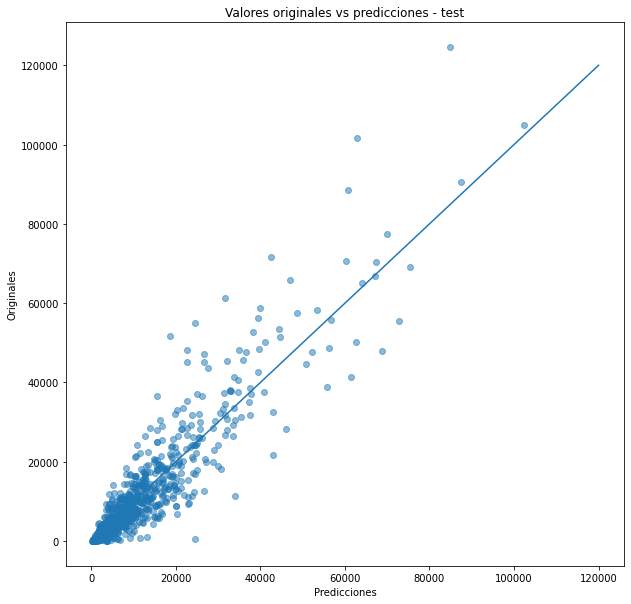

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(preds_21, y_test, alpha=0.5)
plt.plot( [0,120000],[0,120000] )
plt.xlabel('Predicciones')
plt.ylabel('Originales')
plt.title('Valores originales vs predicciones - test')
plt.show()

Errores para Train

Creamos dataframe para ver los errores- absolutos y porcentuales- según variables originales

In [27]:
df_errores = X_train.copy()
df_errores['prediccion'] = m.predict(X_train)
df_errores['produccion'] = y_train
df_errores['error'] = abs(df_errores.prediccion - df_errores.produccion)
df_errores['error_p'] = (df_errores.error / df_errores.produccion)*100

Los errores absolutos se encuentran cerca del 0 para el set de entrenamiento, llegando a valores de 15000

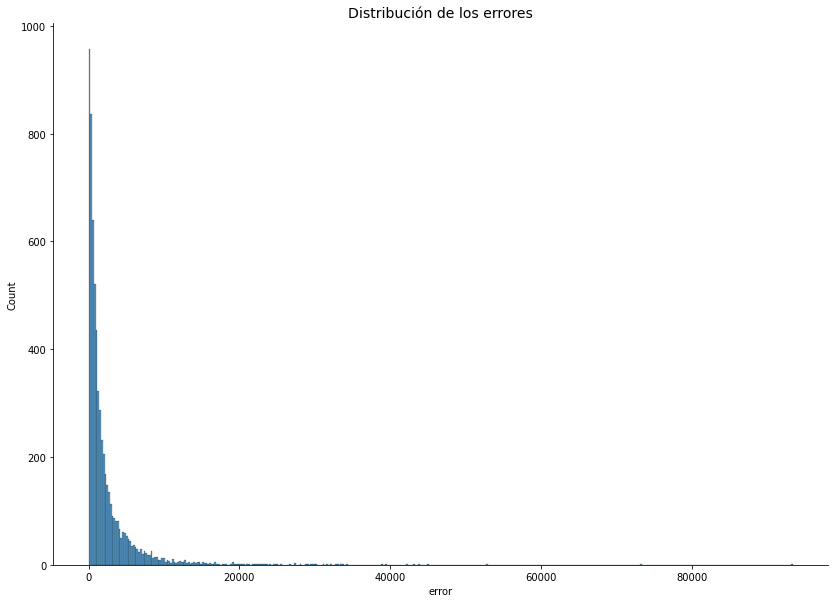

In [30]:
sns.displot(df_errores.error, height=8.27, aspect=11.7/8.27)
plt.title('Distribución de los errores', fontsize=14)
plt.show()

El orden de variables correlacionadas con el error es parecido a aquel de importancia de variables comentado previamente, dandole mayor entidad a las producciones pasadas e hipoteticas según las caracteristicas propias de la finca.

In [31]:
df_errores.corr()['error'].sort_values(ascending=False).head(20)

error                                     1.00
produccion                                0.68
prediccion                                0.61
superficie                                0.55
prod_shift_max                            0.53
prod_shift_avg                            0.53
prod_he_shift_avg_total                   0.53
prod_he_shift1_total                      0.51
prod_shift1                               0.51
prod_he_var_modo_mean_shift1_total        0.51
prod_he_var_mean_hist_total               0.50
prod_var_shift_1                          0.50
prod_he_var_mean_shift1_total             0.49
sup_shift1                                0.47
prod_shift2                               0.43
prod_he_shift2_total                      0.43
prod_he_zona_mean_shift1_total            0.42
prod_var_shift_2                          0.41
prod_he_var_modo_zona_mean_shift1_total   0.41
prod_he_var_zone_mean_hist_total          0.39
Name: error, dtype: float64

No hay una clara relacion entre errores y superficies, pero si la hay con las producciones más altas. Como se enseño previamente, el modelo encuentra mayor dificultad en predecir estas ultimas.

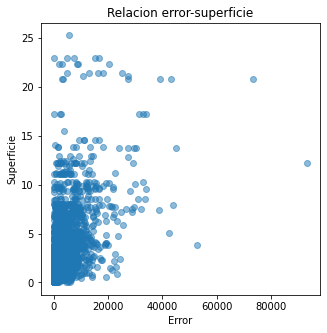

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(x=df_errores.error, y=df_errores.superficie , alpha=0.5)
plt.xlabel('Error')
plt.ylabel('Superficie')
plt.title('Relacion error-superficie')
plt.show()

Tampoco hay una clara relación entre error y altitud

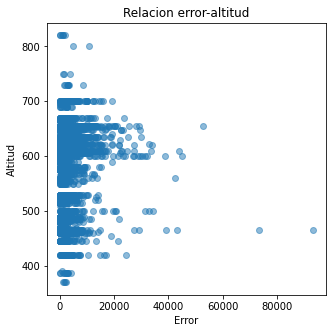

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(x=df_errores.error, y=df_errores.altitud , alpha=0.5)
plt.xlabel('Error')
plt.ylabel('Altitud')
plt.title('Relacion error-altitud')
plt.show()

Así mismo, las variedades con mayor produccion tienen un mayor error de produccion. Algunas que se destacan son, por ejemplo, la variedad 32, 17 o 59. Estas son las mas comunes en el viñedo.

Errores para Test

In [39]:
df_errores_test = X_test.copy()
df_errores_test['produccion'] = y_test
df_errores_test['preds'] = m.predict(X_test)
df_errores_test['error'] = df_errores_test.produccion - df_errores_test.preds
df_errores_test['error_abs'] = abs(df_errores_test.error)
df_errores_test['error_p'] = (df_errores_test.error / df_errores_test.produccion)*100
df_errores_test.head()

,campaña,id_finca,id_zona,id_estacion,altitud,variedad,modo,tipo,color,superficie,std_superficie,std_superficie_null,sup_is_nan,sup_tot_camp_finca,superficie_total,n_var_camp_finca,prod_shift1,prod_shift2,sup_shift1,sup_shift2,prod_shift1_gt_shift2,prod_shift_max,prod_shift_change,prod_shift_avg,prod_est_mean_change,prod_he_shift1,prod_he_shift2,prod_he_shift_change,prod_he_shift_avg,prod_he_var_zone_mean_hist,prod_he_var_zone_std_hist,prod_he_var_mean_hist,prod_he_var_std_hist,prod_var_shift_1,prod_var_shift_2,prod_he_var_modo_zona_mean_shift1,prod_he_var_modo_zona_std_shift1,prod_he_var_modo_zona_change,prod_he_var_modo_mean_shift1,prod_he_var_modo_std_shift1,prod_he_var_modo_change,prod_he_var_mean_shift1,prod_he_var_std_shift1,prod_he_var_change,prod_he_zona_mean_shift1,prod_he_zona_std_shift1,prod_he_zona_change,prod_finca_shift_1,prod_finca_shift_1,prod_he_shift1_total,prod_he_shift2_total,prod_he_shift_change_total,prod_he_shift_avg_total,prod_he_var_zone_mean_hist_total,prod_he_var_zone_std_hist_total,prod_he_var_mean_hist_total,prod_he_var_std_hist_total,prod_he_var_modo_zona_mean_shift1_total,prod_he_var_modo_zona_std_shift1_total,prod_he_var_modo_zona_change_total,prod_he_var_modo_mean_shift1_total,prod_he_var_modo_std_shift1_total,prod_he_var_modo_change_total,prod_he_var_mean_shift1_total,prod_he_var_std_shift1_total,prod_he_var_change_total,prod_he_zona_mean_shift1_total,prod_he_zona_std_shift1_total,prod_he_zona_change_total,year_x,ID_ESTACION_x,MeanDewpointLocalDayAvgMonth1,MeanDewpointLocalDayAvgMonth2,MeanDewpointLocalDayAvgMonth3,MeanDewpointLocalDayAvgMonth4,MeanDewpointLocalDayAvgMonth5,MeanDewpointLocalDayAvgMonth6,MeanEvapotranspirationLocalDayAvgMonth1,MeanEvapotranspirationLocalDayAvgMonth2,MeanEvapotranspirationLocalDayAvgMonth3,MeanEvapotranspirationLocalDayAvgMonth4,MeanEvapotranspirationLocalDayAvgMonth5,MeanEvapotranspirationLocalDayAvgMonth6,MeanFeelsLikeLocalDayAvgMonth1,MeanFeelsLikeLocalDayAvgMonth2,MeanFeelsLikeLocalDayAvgMonth3,MeanFeelsLikeLocalDayAvgMonth4,MeanFeelsLikeLocalDayAvgMonth5,MeanFeelsLikeLocalDayAvgMonth6,MeanGlobalHorizontalIrradianceLocalDayAvgMonth1,MeanGlobalHorizontalIrradianceLocalDayAvgMonth2,MeanGlobalHorizontalIrradianceLocalDayAvgMonth3,MeanGlobalHorizontalIrradianceLocalDayAvgMonth4,MeanGlobalHorizontalIrradianceLocalDayAvgMonth5,MeanGlobalHorizontalIrradianceLocalDayAvgMonth6,MeanGustLocalDayAvgMonth1,MeanGustLocalDayAvgMonth2,MeanGustLocalDayAvgMonth3,MeanGustLocalDayAvgMonth4,MeanGustLocalDayAvgMonth5,MeanGustLocalDayAvgMonth6,MeanMSLPLocalDayAvgMonth1,MeanMSLPLocalDayAvgMonth2,MeanMSLPLocalDayAvgMonth3,MeanMSLPLocalDayAvgMonth4,MeanMSLPLocalDayAvgMonth5,MeanMSLPLocalDayAvgMonth6,MeanPrecipAmountLocalDayAvgMonth1,MeanPrecipAmountLocalDayAvgMonth2,MeanPrecipAmountLocalDayAvgMonth3,MeanPrecipAmountLocalDayAvgMonth4,MeanPrecipAmountLocalDayAvgMonth5,MeanPrecipAmountLocalDayAvgMonth6,MeanRelativeHumidityLocalDayAvgMonth1,MeanRelativeHumidityLocalDayAvgMonth2,MeanRelativeHumidityLocalDayAvgMonth3,MeanRelativeHumidityLocalDayAvgMonth4,MeanRelativeHumidityLocalDayAvgMonth5,MeanRelativeHumidityLocalDayAvgMonth6,MeanSnowAmountLocalDayAvgMonth1,MeanSnowAmountLocalDayAvgMonth2,MeanSnowAmountLocalDayAvgMonth3,MeanSnowAmountLocalDayAvgMonth4,MeanSnowAmountLocalDayAvgMonth5,MeanSnowAmountLocalDayAvgMonth6,MeanTemperatureLocalDayAvgMonth1,MeanTemperatureLocalDayAvgMonth2,MeanTemperatureLocalDayAvgMonth3,MeanTemperatureLocalDayAvgMonth4,MeanTemperatureLocalDayAvgMonth5,MeanTemperatureLocalDayAvgMonth6,MeanUVIndexLocalDayAvgMonth1,MeanUVIndexLocalDayAvgMonth2,MeanUVIndexLocalDayAvgMonth3,MeanUVIndexLocalDayAvgMonth4,MeanUVIndexLocalDayAvgMonth5,MeanUVIndexLocalDayAvgMonth6,MeanVisibilityLocalDayAvgMonth1,MeanVisibilityLocalDayAvgMonth2,MeanVisibilityLocalDayAvgMonth3,MeanVisibilityLocalDayAvgMonth4,MeanVisibilityLocalDayAvgMonth5,MeanVisibilityLocalDayAvgMonth6,MeanWindSpeedLocalDayAvgMonth1,MeanWindSpeedLocalDayAvgMonth2,MeanWindSpeedLocalDayAvgMonth3,MeanWindSpeedLocalDayAvgMont

Vemos que en test el modelo comete errores más altos, signo de sobreajuste.

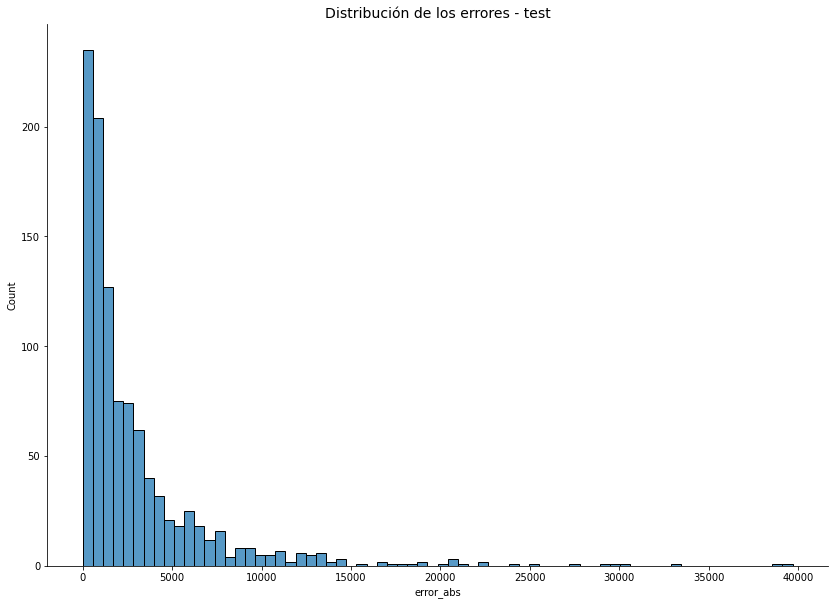

In [40]:
sns.displot(df_errores_test.error_abs, height=8.27, aspect=11.7/8.27)
plt.title('Distribución de los errores - test', fontsize=14)
plt.show()

La relación tampoco es clara entre superficie y errores en Test

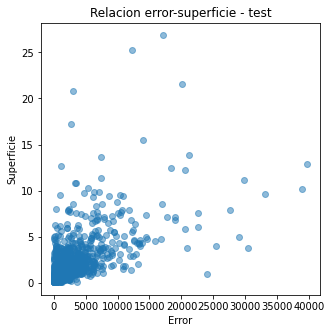

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x=df_errores_test.error_abs, y=df_errores_test.superficie , alpha=0.5)
plt.xlabel('Error')
plt.ylabel('Superficie')
plt.title('Relacion error-superficie - test')
plt.show()

Tambien podemos evaluar los modelos según la existencia previa de la finca, variedad, modo y tipo

In [42]:
#Flag para reconocer fincas nuevas

df_errores['identificador'] = df_errores.id_finca.astype(str) +  '-' +df_errores.variedad.astype(str) +  '-'+ df_errores.modo.astype(str) +  '-' +df_errores.tipo.astype(str)
df_errores_test['identificador'] = df_errores_test.id_finca.astype(str) +  '-' +df_errores_test.variedad.astype(str) +  '-'+ df_errores_test.modo.astype(str) +  '-' +df_errores_test.tipo.astype(str)

codigos = list(df_errores.identificador.unique())
exists = [1 if x in codigos else 0 for x in df_errores_test.identificador]
df_errores_test['exists_flag'] = exists

df_errores_test['exists_flag'].value_counts()

1    977
0     67
Name: exists_flag, dtype: int64

Notamos que el modelo tiene errores parecidos en terminos absolutos para nuevas y existentes fincas (teniendo en cuenta su variedad, modo y tipo)

In [43]:
df_errores_test.groupby('exists_flag')['error_abs'].agg('mean')

exists_flag
0   2694.10
1   3020.33
Name: error_abs, dtype: float64

En terminos relativos (porcentaje), incluso es mejor para nuevos casos.

In [44]:
df_errores_test.groupby('exists_flag')['error_p'].agg('mean')

exists_flag
0   -313.03
1   -622.46
Name: error_p, dtype: float64

### Shap Values

In [16]:
import shap
shap.initjs()

Entrenamos el modelo para 2022

In [46]:
m = mm.get_final_model()
m.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Flag',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['sup_is_nan']),
                                                 ('Zona_encoder',
                                                  TargetEncoder(),
                                                  ['id_zona']),
                                                 ('Zona_encoder_2',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['id_zona']),
                                                 ('Variedad_encoder',
                                                  OrdinalEncoder(handle_unk...
                                                   'SumTotalPrecipAmountLocalDayMonth4',
                                                   'SumTotalPrecipAmountLocalDayMonth5',
                                                   'SumTotalPrecipAmountLocalDayMonth6']),
                                                 ('Snow', StandardScaler(),
                                                  ['SumTotalSnowAmountLocalDayMonth1',
                                                   'SumTotalSnowAmountLocalDayMonth2'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.2, max_samples=0.8,
                                       min_samples_leaf=4, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [17]:
explainer = shap.TreeExplainer(m[-1])

In [18]:
x_sample = X.sample(int(0.7*X.shape[0]))
x_sample_trans = pd.DataFrame(
    m[:-1].transform(x_sample),
    columns=m[:-1].get_feature_names_out(),
)

Creamos shap values y los guardamos para no correr el codigo nuevamente

In [19]:
#shap_values = explainer.shap_values(x_sample_trans)
#mm.save_trained_model(shap_values,'../data/models/shap_values.pickle')

Leemos shap values previamente construidos y guardados

In [56]:
shap_values = mm.load_trained_model('../data/models/shap_values.pickle')

Valores altos (rojos) de las variables de producciones pasadas y superficies, por ejemplo, otorgan una prediccion (shap value) alta de la producción.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


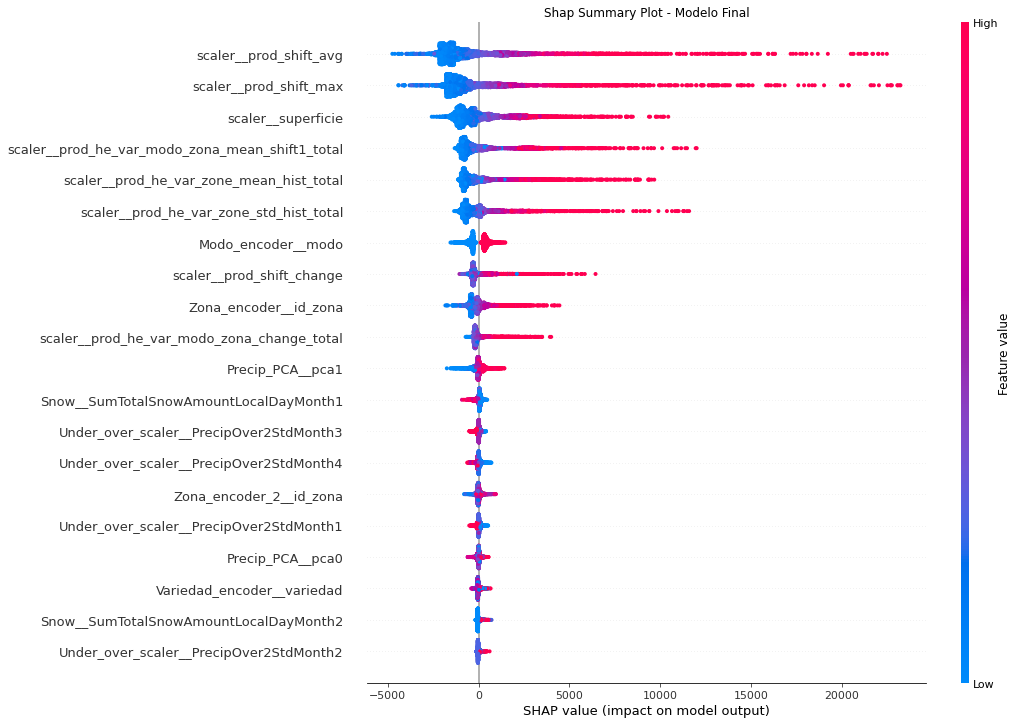

In [57]:
plt.figure(facecolor="white")
shap.summary_plot(shap_values, x_sample_trans, plot_size=[15,10], show = False)
plt.title("Shap Summary Plot - Modelo Final") 
plt.show()

Visualizamos una relación directa entre valores de las predicciones y los valores previos de la produccion o valores de la superficie

<Figure size 432x288 with 0 Axes>

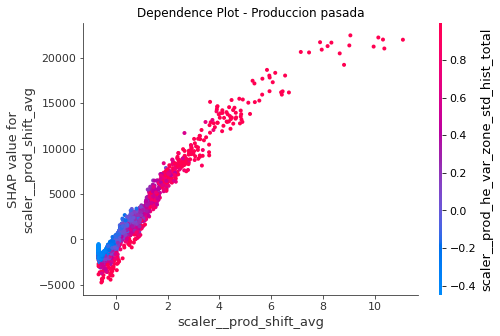

<Figure size 432x288 with 0 Axes>

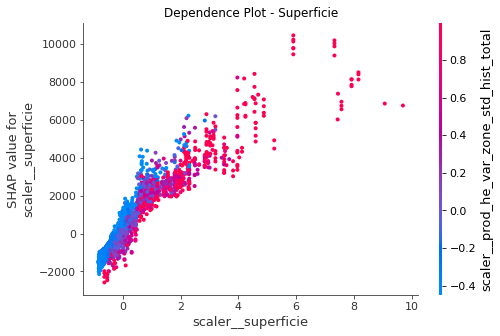

In [52]:
plt.figure(facecolor="white")
shap.dependence_plot('scaler__prod_shift_avg', shap_values, x_sample_trans,show=False)
plt.title("Dependence Plot - Produccion pasada") 
plt.show()

plt.figure(facecolor="white")
shap.dependence_plot('scaler__superficie', shap_values, x_sample_trans, show=False)
plt.title("Dependence Plot - Superficie") 
plt.show()